In [1]:
import numpy as np

from squlearn.util.pennylane.pennylane_device import PennyLaneDevice
from squlearn.util.pennylane.pennylane_circuit import PennyLaneCircuit

from qiskit.circuit import QuantumCircuit

from qiskit.circuit import ParameterVector

from squlearn.encoding_circuit import HubregtsenEncodingCircuit

from squlearn.observables import SummedPaulis


In [2]:
obs = SummedPaulis(4)


param = ParameterVector('a', obs.num_parameters)

op = obs.get_operator(param)

print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*a[0]), ParameterExpression(1.0*a[1]),
 ParameterExpression(1.0*a[2]), ParameterExpression(1.0*a[3]),
 ParameterExpression(1.0*a[4])])


In [3]:
op.parameters

ParameterView([ParameterVectorElement(a[0]), ParameterVectorElement(a[4]), ParameterVectorElement(a[1]), ParameterVectorElement(a[2]), ParameterVectorElement(a[3])])

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


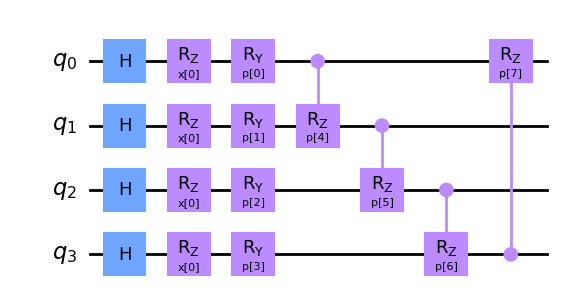

In [4]:
pqc = HubregtsenEncodingCircuit(4,1)

x = ParameterVector("x",pqc.num_features)
p = ParameterVector("p",pqc.num_parameters)

circuit = pqc.get_circuit(x,p)
circuit.draw()


In [7]:
# circuit.draw()

In [8]:
device = PennyLaneDevice()
pcirc = PennyLaneCircuit(device, circuit, op)

self._pennylane_gates [<class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>]
s

In [9]:
#pcirc.draw()

In [10]:
np.random.seed(42)
p_val = np.random.rand(pqc.num_parameters)
x_val = np.random.rand(pqc.num_features)
a_val = np.random.rand(obs.num_parameters)

pcirc(p=p_val, x=x_val,a =a_val)

tensor(-0.26988097, requires_grad=True)